In [1]:
import pandas_datareader.data as pdr
import statsmodels.api as sm
import numpy as np

end = '2016/9/30'
n225 = pdr.DataReader("NIKKEI225", 'fred', '1949/5/16', end).dropna()
lnn225 = np.log(n225.dropna())
lnn225.columns=['Close']
y = lnn225
x = range(len(lnn225))
x = sm.add_constant(x)
model = sm.OLS(y, x)
results = model.fit()
results.summary()

C:\Users\tono\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 5.196e+04
Date:                Tue, 24 Oct 2017   Prob (F-statistic):               0.00
Time:                        20:29:52   Log-Likelihood:                -18601.
No. Observations:               16769   AIC:                         3.721e+04
Df Residuals:                   16767   BIC:                         3.722e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.1967      0.011    546.859      0.000       6.174       6.219
x1             0.0003   1.17e-06    227.943      0.000       0.000       0.000
==============================================================================
Omnibus:                      560.110   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              284.479
Skew:                          -0.119   Prob(JB):                     1.68e-62
Kurtosis:                       2.408   Cond. No.                     1.94e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.94e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

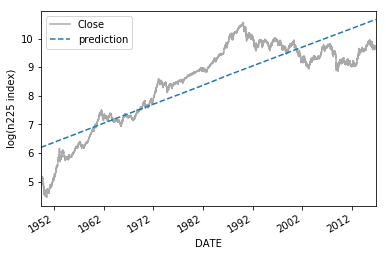

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(y, label='Close', color='darkgray')
results.fittedvalues.plot(label='prediction', style='--')
plt.ylabel('log(n225 index)')
plt.legend(loc='upper left')

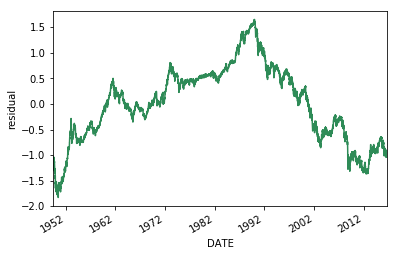

In [4]:
results.resid.plot(color='seagreen')
plt.ylabel('residual')

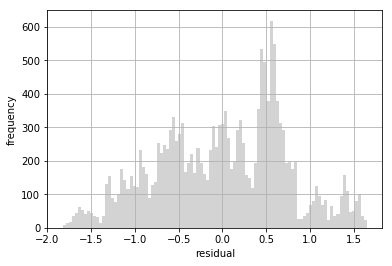

In [5]:
results.resid.hist(bins=100, color='lightgray')
plt.xlabel('residual')
plt.ylabel('frequency')

In [6]:
# 戦後復興期
y = lnn225.ix[:'1954/11/30'].dropna()
x=range(len(y))
x=sm.add_constant(x)
model=sm.OLS(y,x)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     4438.
Date:                Tue, 24 Oct 2017   Prob (F-statistic):               0.00
Time:                        20:43:11   Log-Likelihood:                -65.389
No. Observations:                1391   AIC:                             134.8
Df Residuals:                    1389   BIC:                             145.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5236      0.014    332.550      0.000       4.497       4.550
x1             0.0011   1.69e-05     66.618      0.000       0.001       0.001
==============================================================================
Omnibus:                      160.558   Durbin-Watson:                   0.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              121.287
Skew:                           0.624   Prob(JB):                     4.60e-27
Kurtosis:                       2.268   Cond. No.                     1.60e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

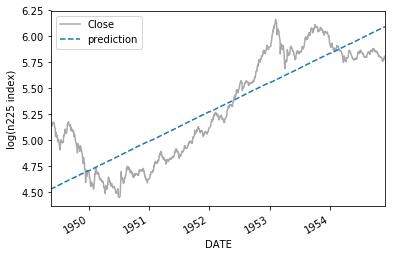

In [8]:
plt.plot(y, label='Close', color='darkgray')
results.fittedvalues.plot(label='prediction', style='--')
plt.ylabel('log(n225 index)')
plt.legend(loc='upper left')